# Agent parameters / News fitness

Based on attributes of the agent, the news and the used network the dynamics of the system will be different. 
The parameters we will consider, are:
* threshold $\phi_{\nu}$: The threshold above which an agent $\nu$ will distribute the news
* independent thought $\alpha_{\nu}$: The amount of an agent's self-influence
* opinion $\beta_{\nu}$: the agent's opinion on the truthfulness of the news
* fitness $\rho$: the attractiveness of the news
* decay parameter $c$: the decay rate of the excitement score function $E_{\nu}$.

Below we investigate the spreading of the news in a network depending on the mentioned parameters above. 

## Simulations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Add parent directory to path (directory which holds the code)

In [2]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath('')))

Import `World` and `Agent` class

In [3]:
from classes.world import World
from classes.agent import Agent

## Threshold $\phi_{\nu}$ vs Attractiveness $\rho$

In [4]:
def generate_share_map(thresholds, fitness, num_agents=100, graph_samples=10, opinion=0.5):
    df = pd.DataFrame(columns=['threshold', 'fitness', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')    
    for threshold in thresholds:
        for f in fitness:
            number_samples = []
            for g_nmb in range(graph_samples):
                agents = [Agent(str(i), threshold, opinion) for i in range(num_agents)]
                
                world = World(num_agents=num_agents, agents=agents, news_fitness=f)
                world.update(time_steps=20)

                number_samples.append(world.get_number_active_agents() / num_agents)
                
            num_sharing = pd.DataFrame([[threshold, f, np.mean(number_samples)]], columns=df.columns)
            df = df.append(num_sharing, ignore_index=True)
            
    print('Simulation completed!!!')
            
    return df.astype(float).pivot('fitness', 'threshold', 'number active')

In [5]:
thresholds = np.linspace(0.0, 1.0, 21)
fitness = np.linspace(0.0, 1.0, 21)

share_map = generate_share_map(thresholds, fitness)

Starting simulation with 100 agents (this may take some time...)
Simulation completed!!!


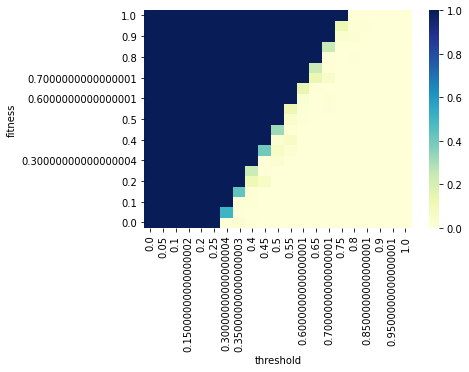

In [6]:
ax = sns.heatmap(share_map, cmap='YlGnBu', vmin=0.0, vmax=1.0)
ax.invert_yaxis()

## Opinion $\beta_{\nu}$ vs Attractiveness $\rho$

In [7]:
def generate_share_map(opinions, fitness, num_agents=100, graph_samples=10, threshold=0.5):
    df = pd.DataFrame(columns=['opinion', 'fitness', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')    
    for opinion in opinions:
        for f in fitness:
            number_samples = []
            for g_nmb in range(graph_samples):
                agents = [Agent(str(i), threshold, opinion) for i in range(num_agents)]
                
                world = World(num_agents=num_agents, agents=agents, news_fitness=f)
                world.update(time_steps=20)

                number_samples.append(world.get_number_active_agents() / num_agents)
                
            num_sharing = pd.DataFrame([[opinion, f, np.mean(number_samples)]], columns=df.columns)
            df = df.append(num_sharing, ignore_index=True)
            
    print('Simulation completed!!!')
            
    return df.astype(float).pivot('fitness', 'opinion', 'number active')

In [8]:
opinions = np.linspace(0.0, 1.0, 21)
fitness = np.linspace(0.0, 1.0, 21)

share_map = generate_share_map(opinions, fitness)

Starting simulation with 100 agents (this may take some time...)
Simulation completed!!!


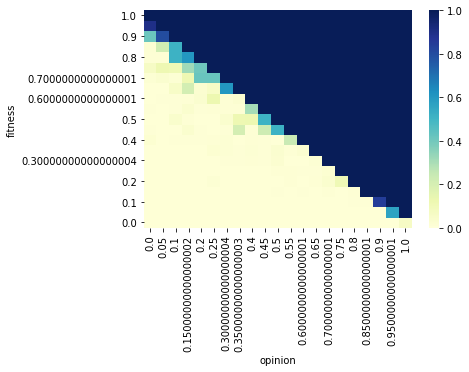

In [9]:
ax = sns.heatmap(share_map, cmap='YlGnBu', vmin=0.0, vmax=1.0)
ax.invert_yaxis()

## Self influence $\alpha_{\nu}$ vs Attractiveness $\rho$

In [ ]:
def generate_share_map(self_influences, fitness, num_agents=100, graph_samples=10, threshold=0.5, opinion=0.5):
    df = pd.DataFrame(columns=['self influence', 'fitness', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')    
    for self_influence in self_influences:
        for f in fitness:
            number_samples = []
            for g_nmb in range(graph_samples):
                agents = [Agent(str(i), threshold, opinion) for i in range(num_agents)]
                
                world = World(num_agents=num_agents, agents=agents, news_fitness=f)
                world.update(time_steps=20)

                number_samples.append(world.get_number_active_agents() / num_agents)
                
            num_sharing = pd.DataFrame([[self_influence, f, np.mean(number_samples)]], columns=df.columns)
            df = df.append(num_sharing, ignore_index=True)
            
    print('Simulation completed!!!')
            
    return df.astype(float).pivot('fitness', 'self influence', 'number active')

In [ ]:
self_influences = np.linspace(0.0, 1.0, 21)
fitness = np.linspace(0.0, 1.0, 21)

share_map = generate_share_map(self_influences, fitness)

In [ ]:
ax = sns.heatmap(share_map, cmap='YlGnBu', vmin=0.0, vmax=1.0)
ax.invert_yaxis()

## Decay parameter $c$ vs Attractiveness $\rho$

In [ ]:
def generate_share_map(decay_parameters, fitness, num_agents=100, graph_samples=10, threshold=0.5, opinion=0.5):
    df = pd.DataFrame(columns=['decay_parameter', 'fitness', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')    
    for c in decay_parameters:
        for f in fitness:
            number_samples = []
            for g_nmb in range(graph_samples):
                agents = [Agent(str(i), threshold, opinion) for i in range(num_agents)]
                
                world = World(num_agents=num_agents, agents=agents, news_fitness=f)
                world.update(time_steps=20)

                number_samples.append(world.get_number_active_agents() / num_agents)
                
            num_sharing = pd.DataFrame([[c, f, np.mean(number_samples)]], columns=df.columns)
            df = df.append(num_sharing, ignore_index=True)
            
    print('Simulation completed!!!')
            
    return df.astype(float).pivot('fitness', 'decay_parameter', 'number active')

In [ ]:
decay_parameters = np.linspace(0.0, 1.0, 21)
fitness = np.linspace(0.0, 1.0, 21)

share_map = generate_share_map(decay_parameters, fitness)

In [ ]:
ax = sns.heatmap(share_map, cmap='YlGnBu', vmin=0.0, vmax=1.0)
ax.invert_yaxis()

In [ ]:
ax = sns.heatmap(share_map, cmap='YlGnBu', vmin=0.0, vmax=1.0)
ax.invert_yaxis()